## Cancer Diagnosis Capstone Project Baseline Model

The purpose of this part of the project is to:
1. Prepare and split the data for modeling
2. Create a baseline model that can be used to inform the development of more sophisticated models. In other words, once a baseline is built through simple models, the goal then becomes to build better models.

The simple model that I am going to use is Logistic Regression.  I have also decided that I want to create two groups for testing.  One group will include all of the data other that area and parameter mean, since they are directly correlated with radius mean.  The other group will simply include the five variables that I kept after removing all of the high correlations.  For a reminder, those five variables are: <br>
radius mean<br>
texture mean<br>
smoothness mean<br>
area standard error<br>
concavity standard error

#### Preprocessing and splitting the data

First I need to get the data ready for splitting.  There are no categorical variables, so it should be as simple as picking variables that I want.

In [1]:
#Import everything that I plan on using during this project
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Also import models for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data.  I am going to be doing the same procedure with both datasets (the full one and the one with the five variables listed above)
cancer_full = pd.read_csv('cancer.csv', index_col=0)
cancer_part = pd.read_csv('cancer_model.csv', index_col=0)

cancer_full.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_num
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
cancer_part.head()

,diagnosis,diagnosis_num,radius_mean,texture_mean,smoothness_mean,area_se,concavity_se
id,,,,,,,
842302,M,1,17.99,10.38,0.11840,153.40,0.05373
842517,M,1,20.57,17.77,0.08474,74.08,0.01860
84300903,M,1,19.69,21.25,0.10960,94.03,0.03832
84348301,M,1,11.42,20.38,0.14250,27.23,0.05661
84358402,M,1,20.29,14.34,0.10030,94.44,0.05688


I have kept the diagnosis in as a reference, but now I will need to remove it for modeling.  A value of 1 means the tumor was malignant, and a value of 0 means the tumor was benign.

In [4]:
#First to prepare the full cancer data.  I am going to remove perimiter and area mean and the diagnosis.
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(cancer_full.drop(columns=['diagnosis','area_mean','perimeter_mean','diagnosis_num']),cancer_full.diagnosis_num,test_size=0.2, random_state=42)
X_train_f.shape, X_test_f.shape

((455, 28), (114, 28))

In [5]:
y_train_f.shape, y_test_f.shape

((455,), (114,))

In [6]:
#Now to prepare the cancer data with the high correlation variables filtered out.
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(cancer_part.drop(columns=['diagnosis','diagnosis_num']),cancer_full.diagnosis_num,test_size=0.2, random_state=43)
X_train_p.shape, X_test_p.shape

((455, 5), (114, 5))

In [7]:
y_train_p.shape, y_test_p.shape

((455,), (114,))

#### Modeling the Data

Now it is time to do a baseline model of the data using Logistic Regression.  I am going to perform Logistic Regression with no hyperparameters set, just using the default hyperparameters, and then I will perform Logistic Regression after running Gridsearch to find more ideal hyperparameters.  I am also going to run this on both models.  After each model run, I will score the results.

In [8]:
#Logistic Regression on full dataset
lr = LogisticRegression()
lr_full = lr.fit(X_train_f,y_train_f)
y_pred_lr_full = lr_full.predict(X_test_f)
accuracy_score_lr_full = accuracy_score(y_test_f,y_pred_lr_full)
accuracy_score_lr_full

0.956140350877193

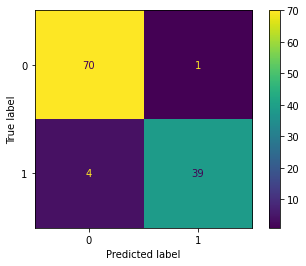

In [9]:
#show the confusion matrix
lr_full_confusion_matrix = plot_confusion_matrix(lr_full, X_test_f, y_test_f)

At first glace, this seems impressively accurate.  Only 5 out of 114 (4.38%) were misclassified.  The ROC curve is worth looking at as well.

In [10]:
#Create a function for plotting ROC curve that can be used multiple times.
def plot_roc_curve(y_test, y_pred_prob, title, label=None):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title(title,fontsize=15)
    plt.show()

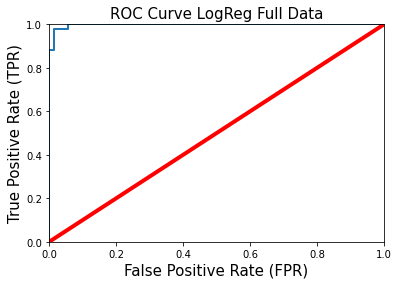

In [11]:
#plot the ROC curve
y_pred_prob_f = lr.predict_proba(X_test_f)[:,1]
plot_roc_curve(y_test_f,y_pred_prob_f,'ROC Curve LogReg Full Data')

In [12]:
#Calculate the area under the curve.
roc_score_f = roc_auc_score(y_test_f, y_pred_prob_f)
print("AUC: ", roc_score_f)

AUC:  0.99737962659679


In [13]:
#Look at the classification report
class_rep_f = classification_report(y_test_f, y_pred_lr_full)
print(class_rep_f)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



That ROC curve and the AUC are almost looks perfect. I would like to see a higher recall though.  Let's see if there is a difference with the reduced variables.

In [14]:
#Logistic Regression on reduced dataset
lr_p = LogisticRegression()
lr_part = lr_p.fit(X_train_p,y_train_p)
y_pred_lr_part = lr_part.predict(X_test_p)
accuracy_score_lr_part = accuracy_score(y_test_p,y_pred_lr_part)
accuracy_score_lr_part

0.9298245614035088

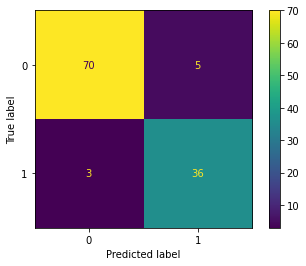

In [15]:
lr_part_confusion_matrix = plot_confusion_matrix(lr_part, X_test_p, y_test_p)

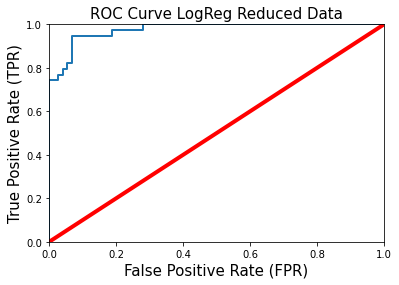

In [16]:
#plot ROC Curve
y_pred_prob_p = lr_p.predict_proba(X_test_p)[:,1]
plot_roc_curve(y_test_p,y_pred_prob_p,'ROC Curve LogReg Reduced Data')

In [17]:
#Calculate the area under the curve.
roc_score_p = roc_auc_score(y_test_p, y_pred_prob_p)
print("AUC: {}".format(roc_score_p))

AUC: 0.9764102564102564


In [18]:
#Look at the classification report
class_rep_p = classification_report(y_test_p, y_pred_lr_part)
print(class_rep_p)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        75
           1       0.88      0.92      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



8 out of 114 (7%) were misclassfied.  While it is slightly worse than the full data, and the ROC curve isn't as close to perfect, I would not consider the difference significant.  I do notice that the reduced model incorrectly predicted a positive diagnosis when the patient was negative more often than the full model, but the reduced model incorrectly predicted a negative diagnosis when the patient was positive less often.  It is much more important that false negatives be reduced than false positives.  Also the recall on a positive diagnosis for the full dataset and partial dataset was 91% and 92%, respectively.  This is a percentage of the actual positives that were diagnosed as positive, which is also very important.  The partial dataset was more favorable in that situation.

#### Finding the best Logistic Regression Model

While these models had an impressive accuracy, I want to see if I can improve on that.  I will use GridSearchCV to make a wider variety of penalties, l1, l2, and elastic net, and I will also change the strength of the penalty. The default was l2 and a penalty of one.

In [19]:
#Gridsearch on full dataset
lr_gs = LogisticRegression()
param  = {'penalty' : ['l1', 'l2', 'elasticnet'], 'C' : [0.001,0.01,0.1,1,10,100]}
gs_f = GridSearchCV(lr_gs, param, cv=5, n_jobs=-1)
gs_f.fit(X_train_f,y_train_f)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [20]:
gs_f.best_params_

{'C': 10, 'penalty': 'l2'}

The penalty was the same, but this a penalty of 10 seems to be more effective.  Lets run it and chart the results to see the difference.

In [21]:
lr_gs = LogisticRegression(C=10, penalty = 'l2')
lr_gs_full = lr_gs.fit(X_train_f,y_train_f)
y_pred_lr_gs_full = lr_gs_full.predict(X_test_f)
accuracy_score_lr_gs_full = accuracy_score(y_test_f,y_pred_lr_gs_full)
accuracy_score_lr_gs_full

0.9736842105263158

That is a better accuracy, so it's worth looking at the rest of the data for this.

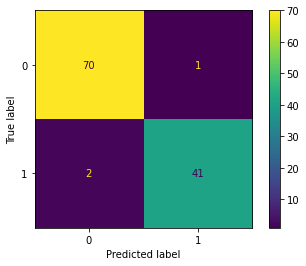

In [22]:
#Plot the confusion matrix
lr_gs_full_confusion_matrix = plot_confusion_matrix(lr_gs_full, X_test_f, y_test_f)

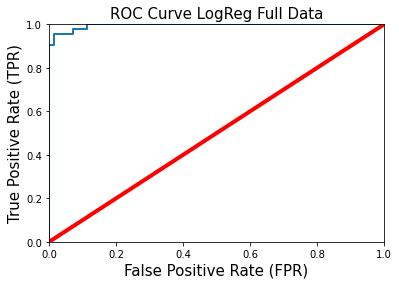

In [23]:
#plot the ROC curve
y_pred_prob_gs_f = lr_gs.predict_proba(X_test_f)[:,1]
plot_roc_curve(y_test_f,y_pred_prob_gs_f,'ROC Curve LogReg Full Data')

In [24]:
#Calculate the area under the curve.
roc_score_gs_f = roc_auc_score(y_test_f, y_pred_prob_gs_f)
print("AUC: ", roc_score_gs_f)

AUC:  0.9950867998689814


In [25]:
#Look at the classification report
class_rep_gs_f = classification_report(y_test_f, y_pred_lr_gs_full)
print(class_rep_gs_f)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



These numbers show improvement, with the most important being:<br>
a. Accuracy of 97.37% <br>
b. 2 out of 114 (1.75%) false negatives <br>
c. A recall (when positive diagnoses are collectly predicted) of 95% <br>
d. An AUC of 99.5%

These are very good numbers.  Lets see how it looks on the partial dataset.

In [26]:
#Gridsearch on partial dataset
lr_gs_p = LogisticRegression()
gs_f_p = GridSearchCV(lr_gs_p, param, cv=5, n_jobs=-1)
gs_f_p.fit(X_train_p,y_train_p)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [27]:
gs_f_p.best_params_

{'C': 100, 'penalty': 'l2'}

In [28]:
lr_gs_p = LogisticRegression(C=100, penalty = 'l2')
lr_gs_part = lr_gs_p.fit(X_train_p,y_train_p)
y_pred_lr_gs_p = lr_gs_part.predict(X_test_p)
accuracy_score_lr_gs_part = accuracy_score(y_test_p,y_pred_lr_gs_p)
accuracy_score_lr_gs_part

0.9210526315789473

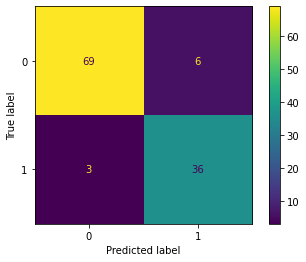

In [29]:
#Plot the confusion matrix
lr_gs_part_confusion_matrix = plot_confusion_matrix(lr_gs_part, X_test_p, y_test_p)

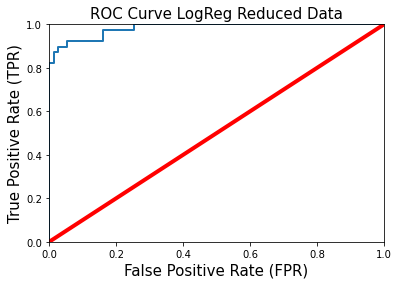

In [30]:
#plot ROC Curve
y_pred_prob_gs_p = lr_gs_p.predict_proba(X_test_p)[:,1]
plot_roc_curve(y_test_p,y_pred_prob_gs_p,'ROC Curve LogReg Reduced Data')

In [31]:
#Calculate the area under the curve.
roc_score_gs_p = roc_auc_score(y_test_p, y_pred_prob_gs_p)
print("AUC: ", roc_score_gs_p)

AUC:  0.9825641025641025


In [32]:
#Look at the classification report
class_rep_gs_p = classification_report(y_test_p, y_pred_lr_gs_p)
print(class_rep_gs_p)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        75
           1       0.86      0.92      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



These results are close, but not quite as good, so I will stick with the default model of the partial dataset.  Let's look at the feature importance of the full dataset with gridsearched hyperparameters and the partial dataset with the default hyperparameters.

In [33]:
#Feature importance for full model
feat_importances_full = lr_gs_full.coef_[0]
for i,v in enumerate(feat_importances_full):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.86493
Feature: 1, Score: -0.20098
Feature: 2, Score: 0.24959
Feature: 3, Score: 0.81351
Feature: 4, Score: 1.26292
Feature: 5, Score: 0.61500
Feature: 6, Score: 0.38230
Feature: 7, Score: 0.06277
Feature: 8, Score: -0.01936
Feature: 9, Score: -2.81607
Feature: 10, Score: -0.84434
Feature: 11, Score: 0.18610
Feature: 12, Score: 0.03046
Feature: 13, Score: 0.07274
Feature: 14, Score: 0.18354
Feature: 15, Score: 0.07940
Feature: 16, Score: 0.08185
Feature: 17, Score: 0.00112
Feature: 18, Score: -2.22286
Feature: 19, Score: 0.52964
Feature: 20, Score: 0.12887
Feature: 21, Score: 0.02676
Feature: 22, Score: 0.45333
Feature: 23, Score: 2.33902
Feature: 24, Score: 3.16550
Feature: 25, Score: 1.09627
Feature: 26, Score: 1.25910
Feature: 27, Score: 0.22402


Text(0.5, 0, 'Relative Feature Importance Full')

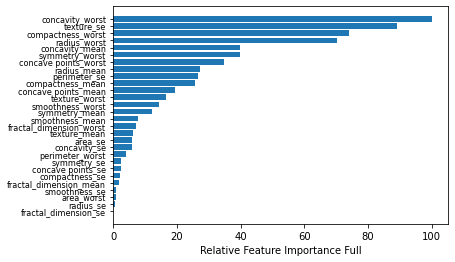

In [34]:
feature_importance = abs(lr_gs_full.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train_f.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance Full')

In [35]:
#Feature Importance for Reduced Model
feat_importances_p = lr_part.coef_[0]
for i,v in enumerate(feat_importances_p):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.68973
Feature: 1, Score: 0.21248
Feature: 2, Score: 0.60413
Feature: 3, Score: 0.06784
Feature: 4, Score: 0.35457


Text(0.5, 0, 'Relative Feature Importance')

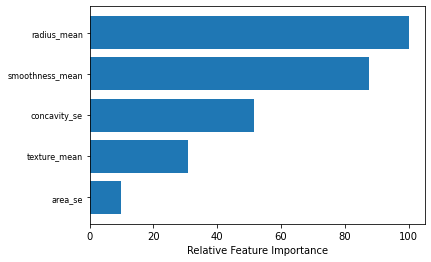

In [36]:

feature_importance = abs(lr_part.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train_p.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

It will be interesting to compare the feature importances here with future models that I will use and compare with this baseline.  This concludes the baseline modeling.  Now it's time to state the extended modeling plan.

## Extended Modeling Plan

#### Context: 
I am building a model to predict if a breast cancer tumor is benign or malignant based off of properties of the nucleus of the cancer cells.  The current data set has 357 benign and 212 malignant samples.

#### Baseline Results:
Logistic Regression has been used in two different sets of data, using the default hyperparameters:
1. The full dataset consisted of 28 determining variables and was split into a training set of 455 samples and a test (holdout) set of 144 samples.
2. The partial dataset consisted of 5 determining variables and was split into a training set of 455 samples and a test (holdout) set of 144 samples.

**Obtained results are:**
1. For the full dataset<br>
a. Accuracy of 97.37% <br>
b. 2 out of 114 (1.75%) false negatives <br>
c. A recall (when positive diagnoses are collectly predicted) of 95% <br>
d. An AUC of 99.5%

2. For the partial dataset <br>
a. Accuracy of 92.98% <br>
b. 3 out of 114 (2.6%) false negatives <br>
c. A recall of 92% <br>
d. AUC of 97.64%

I would consider this good results in related to the business model since accurate diagnosis can be considered life altering in this situation.  The most important being a highly accurate recall and smallest amount of false negatives because all positives want to be identified, so while this is good, it is something that would ideally be improved.<br>
While the dataset has a good amount of samples, more data would be preferred to improve the modeling.  The data is balanced with positives and negatives.

#### Targeted Metrics
1. Accuracy of at least 97% <br>
2. Less than 2 % false negatives <br>
3. A recall of at least 95% <br>
4. AUC of at least 99%

#### Options
**Method:** K-Nearest Neighbors (KNN) <br>
**Variations:** Modeling Parameters: <br>
Number of Neighbors: Range from 1-10 <br>
P (Power parameter for the Minkowski metric): 1(Manhattan Distance), 2(Euclidean Distance)
Weights: Uniform or distance

**Method:** Random Forest Classification <br>
**Variations:** Modeling Parameters: <br>
Number of estimators: 100, 200, 300, 400, 500 <br>
Max depth: 10, 30, 50 <br>
Max features: auto, sqrt, log2

**Method:** XGBoost Classification <br>
**Variations:** Modeling Parameters: <br>
Learning rate (eta) : 0.01, 0.1, 1 <br>
Max depth: 2, 5, 10 <br>
Number of Estimators: 2, 5, 10 

The results of all the modeling will be further visualized with Tableau to compare results.

#### Saving the data
The splits will be saved to be used in the next stage of modeling.  I am also going to save all of the modeling results for potential use for visualization in Tableau.

In [37]:
#Save the partial and full split data
X_train_f.to_csv('X_train_f.csv')
X_test_f.to_csv('X_test_f.csv')
y_train_f.to_csv('y_train_f.csv')
y_test_f.to_csv('y_test_f.csv')

X_train_p.to_csv('X_train_p.csv')
X_test_p.to_csv('X_test_p.csv')
y_train_p.to_csv('y_train_p.csv')
y_test_p.to_csv('y_test_p.csv')

In [38]:
#Save some of the results to be visualized in Tableau.  First the accuracy and ROC score
lr_full = {'accuracy_score_lr_full':accuracy_score_lr_gs_full,'roc_score_f': roc_score_gs_f}
lr_full_scores = pd.DataFrame(lr_full,index=[0]).to_csv('lr_full_scores.csv')

lr_part = {'accuracy_score_lr_part':accuracy_score_lr_part,'roc_score_p': roc_score_p}
lr_part_scores = pd.DataFrame(lr_part,index=[0]).to_csv('lr_part_scores.csv')

In [39]:
#Convert the classification report
class_rep_f = classification_report(y_test_f, y_pred_lr_gs_full, output_dict=True)
class_rep_f = pd.DataFrame(class_rep_f).transpose().to_csv('class_rep_f.csv')

class_rep_p = classification_report(y_test_p, y_pred_lr_part, output_dict=True)
class_rep_p = pd.DataFrame(class_rep_p).transpose().to_csv('class_rep_p.csv')

In [40]:
# Finally the confusion matrix
lr_full_conf_matrix= confusion_matrix(y_test_f, y_pred_lr_gs_full)
lr_full_conf_matrix = pd.DataFrame(lr_full_conf_matrix).transpose().to_csv('lr_full_conf_matrix.csv')

In [41]:
lr_part_conf_matrix= confusion_matrix(y_test_p, y_pred_lr_part)
lr_part_conf_matrix = pd.DataFrame(lr_part_conf_matrix).transpose().to_csv('lr_part_conf_matrix.csv')

In [43]:
#I want the prediction probability for use in tableau, so I will do that
y_pred_proba_lr_f = lr_gs.predict_proba(X_test_f)[:, 1]
pd.DataFrame(y_pred_proba_lr_f).to_csv('y_pred_proba_lr_f.csv')

y_pred_proba_lr_p = lr_p.predict_proba(X_test_p)[:, 1]
pd.DataFrame(y_pred_proba_lr_p).to_csv('y_pred_proba_lr_p.csv')